In [1]:
#Importujemy odpowiednie biblioteki
import numpy as np
import random
import time
import pygad
import math
import statistics

In [70]:
#Kodujemy nasze sieci/macierze/łamigłówki
siec_small_1 = np.array([[3,0,0,0],
                        [0,0,4,0],
                        [0,6,0,5],
                        [2,0,0,0]])

siec_small_2 = np.array([[0, 5, 3, 0, 0],
                        [0, 0, 0, 0, 3],
                        [9, 0, 0, 0, 7],
                        [5, 0, 0, 0, 0],
                        [0, 0, 4, 2, 0]])

siec_small_3 = np.array([[2, 0, 0, 3, 0],
                        [0, 0, 7, 0, 0],
                        [0, 0, 0, 0, 0],
                        [0, 5, 0, 0, 4],
                        [0, 0, 2, 0, 0]])

siec_small_4 = np.array([[0,3,3,0,0],
                         [0,0,0,0,3],
                         [9,0,0,0,7],
                         [5,0,0,0,0],
                         [0,0,4,2,0]])

Pierwsza macierz

Parameters of the best solution :
[[1. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 0. 0. 1.]]
Fitness value of the best solution = 0


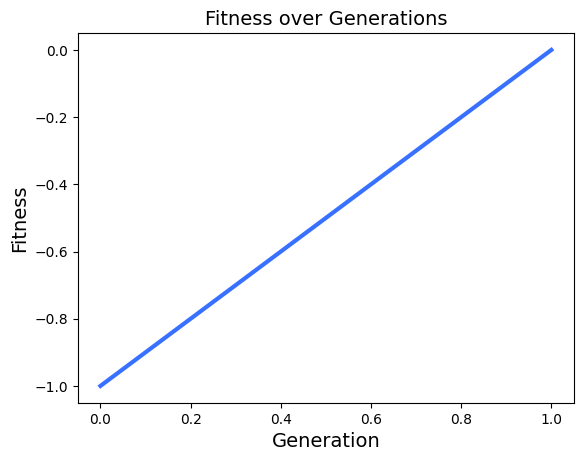

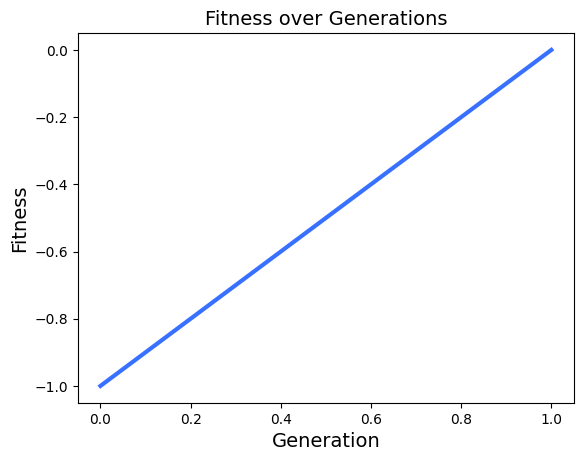

In [129]:
gene_space = [0, 1]
siec = np.array([[3,0,0,0],
                        [0,0,4,0],
                        [0,6,0,5],
                        [2,0,0,0]])

def array_to_matrix(arr): # funckja pomagająca nam w "chodzeniu po rozwiązaniu" 
    n = int(math.sqrt(len(arr))) # zamienia nam ona array na matrix
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i][j] = arr[i*n+j]
    return matrix

def count_orthogonal(matrix, i, j): # funkcja zliczająca jedynki w macierzy ( horizontal & vertical)
    count = 0                       # aby sprawdzać później czy jest odpowiednia ich ilość przy zadanej liczbie w macierzy
    # Check left
    for col in range(j-1, -1, -1):
        if matrix[i][col] == 1:
            count += 1
        else:
            break
    # Check right
    for col in range(j+1, len(matrix[0])):
        if matrix[i][col] == 1:
            count += 1
        else:
            break
    # Check up
    for row in range(i-1, -1, -1):
        if matrix[row][j] == 1:
            count += 1
        else:
            break
    # Check down
    for row in range(i+1, len(matrix)):
        if matrix[row][j] == 1:
            count += 1
        else:
            break
    return count + 1 

def check_neighbors(matrix, i, j): # funkcja sprawdzająca zamknięte komórki, w środku macierzy gdyż takie są niedozwolone
    # Check the neighbors of the given index (i, j)
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    for x, y in neighbors:
        if matrix[x][y] != 1:
            return False
    return True

def check_ones(matrix, i, j):# funkcja sprawdzająca czy każda jedynka ma przynajmniej jednego sąsiada tak aby pętla była spójna
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    for x, y in neighbors:
        if matrix[x][y] == 1:
            return True
    return False

def fitness_func(solution, solution_idx):
    solArr = array_to_matrix(solution)
    spr = 0 
    for x in range(len(siec)):
        for y in range(len(siec)):
            if (solArr[x][y] == 0):
                if x > 0 and x < solArr.shape[0]-1 and y > 0 and y < solArr.shape[1]-1:
                    if check_neighbors(solArr, x, y):
                        spr+=1
            else:
                if x > 0 and x < solArr.shape[0]-1 and y > 0 and y < solArr.shape[1]-1:
                      if not check_ones(solArr, x, y):
                            spr+=1
            if siec[x][y] != 0:
                if (solArr[x][y] == 0):
                    spr+=1
                a = siec[x][y]
                b = count_orthogonal(solArr, x, y)
                spr += abs(a-b)

    fitness = -spr
    return fitness

# Define fitness function
fitness_function = fitness_func

# Set GA parameters
pop_size = 300
num_genes = siec.size
sol_per_pop = 300
num_parents_mating = 200
num_generations = 60
keep_parents = 20
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 8
stop_criteria = "reach_0" # kryterium stopu

# Initialize GA instance
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=pop_size,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)

# Run the GA
ga_instance.run()

# Get the best solution and its fitness value
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution :\n{solution}".format(solution=array_to_matrix(solution)))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# Plot the fitness over generations
ga_instance.plot_fitness(title="Fitness over Generations")

Druga macierz

Parameters of the best solution :
[[1. 1. 1. 0. 1.]
 [1. 1. 0. 0. 1.]
 [1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0.]]
Fitness value of the best solution = 0


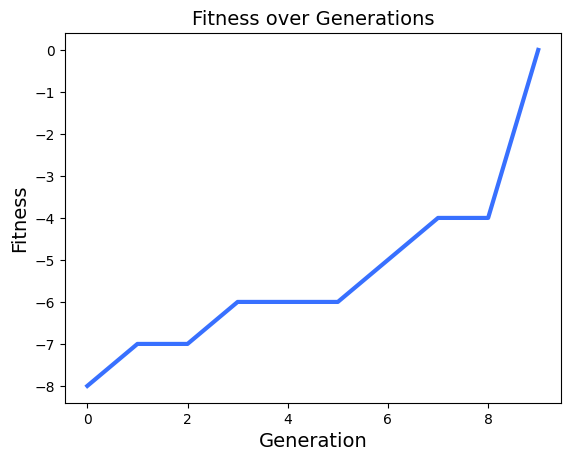

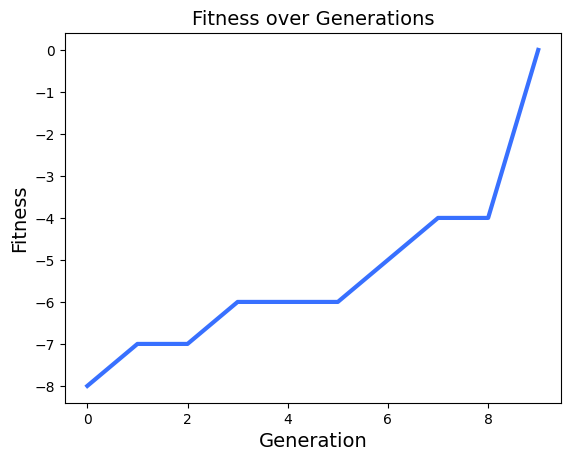

In [23]:
siec= np.array([[0, 5, 3, 0, 0],
                        [0, 0, 0, 0, 3],
                        [9, 0, 0, 0, 7],
                        [5, 0, 0, 0, 0],
                        [0, 0, 4, 2, 0]])

# Define fitness function
fitness_function = fitness_func

# Set GA parameters
pop_size = 300
num_genes = siec.size
sol_per_pop = 300
num_parents_mating = 200
num_generations = 60
keep_parents = 20
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 8
stop_criteria = "reach_0" # kryterium stopu

# Initialize GA instance
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=pop_size,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)

# Run the GA
ga_instance.run()

# Get the best solution and its fitness value
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution :\n{solution}".format(solution=array_to_matrix(solution)))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# Plot the fitness over generations
ga_instance.plot_fitness(title="Fitness over Generations")

Trzecie macierz

Parameters of the best solution :
[[1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1.]
 [1. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1.]]
Fitness value of the best solution = 0


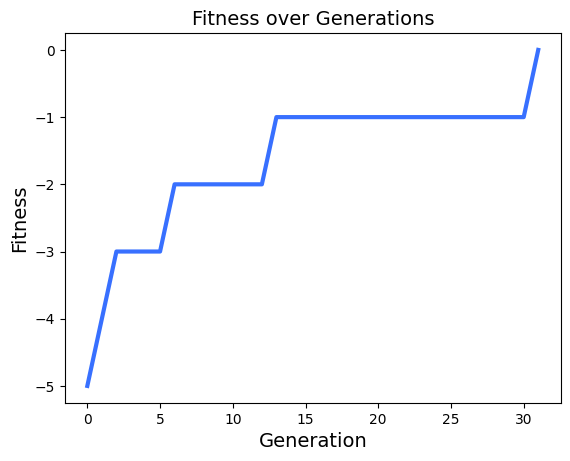

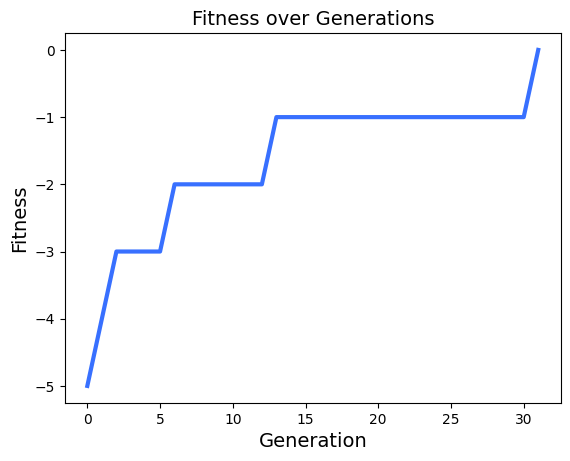

In [125]:
gene_space = [0, 1]
siec = np.array([[2, 0, 0, 3, 0],
                        [0, 0, 7, 0, 0],
                        [0, 0, 0, 0, 0],
                        [0, 5, 0, 0, 4],
                        [0, 0, 2, 0, 0]])


# Define fitness function
fitness_function = fitness_func

# Set GA parameters
pop_size = 300
num_genes = siec.size
sol_per_pop = 300
num_parents_mating = 200
num_generations = 60
keep_parents = 20
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 8
stop_criteria = "reach_0" # kryterium stopu

# Initialize GA instance
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=pop_size,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)

# Run the GA
ga_instance.run()

# Get the best solution and its fitness value
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution :\n{solution}".format(solution=array_to_matrix(solution)))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# Plot the fitness over generations
ga_instance.plot_fitness(title="Fitness over Generations")

Czwarta macierz

Parameters of the best solution :
[[1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0.]]
Fitness value of the best solution = -1


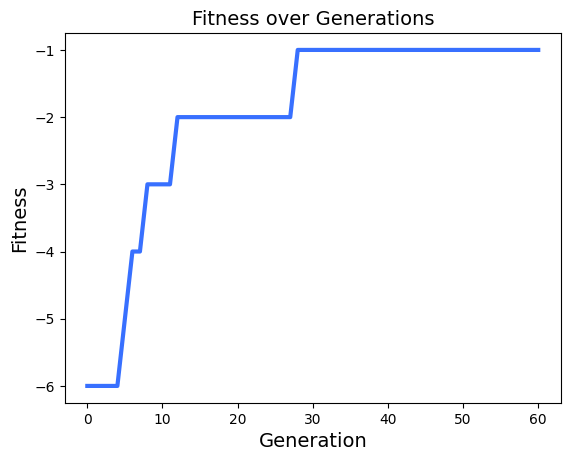

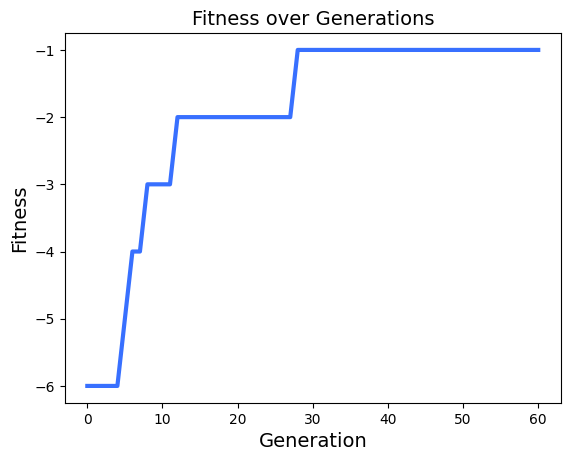

In [128]:
siec = np.array([[0,3,3,0,0],
                         [0,0,0,0,3],
                         [9,0,0,0,7],
                         [5,0,0,0,0],
                         [0,0,4,2,0]])


# Define fitness function
fitness_function = fitness_func

# Set GA parameters
pop_size = 300
num_genes = siec.size
sol_per_pop = 300
num_parents_mating = 200
num_generations = 60
keep_parents = 20
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 8
stop_criteria = "reach_0" # kryterium stopu
# Initialize GA instance
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=pop_size,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)

# Run the GA
ga_instance.run()

# Get the best solution and its fitness value
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution :\n{solution}".format(solution=array_to_matrix(solution)))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# Plot the fitness over generations
ga_instance.plot_fitness(title="Fitness over Generations")

# EFEKTYWNOŚĆ

In [126]:
czas_small = []
small = [siec_small_1, siec_small_2, siec_small_3, siec_small_4]

for i in range(0,100):
    siec = random.choice(small)
    num_genes = siec.size 
    start = time.time()
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    if solution_fitness == 0:
        czas_small.append(end-start)

In [127]:
print('Średni czas pracy algorytmu:',statistics.mean(czas_small))
print('Ilość poprawnych rozwiązań:', len(czas_small))

Średni czas pracy algorytmu: 0.14691771268844606
Ilość poprawnych rozwiązań: 100
